# Read NASA Polynomial

In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.path.abspath('')))

from rmgpy.chemkin import read_thermo_entry
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
nasa = """JP10(1)                 C  10H  16          G   250.000  5000.000   995.043    1
 2.11276455E+01 4.69745784E-02-1.61707340E-05 2.53908066E-09-1.49243686E-13    2
-2.17805308E+04-9.93673803E+01 2.64666089E+00 2.93234923E-03 2.28607707E-04    3
-2.80975977E-07 1.01110601E-10-1.22444499E+04 1.91378052E+01                   4"""

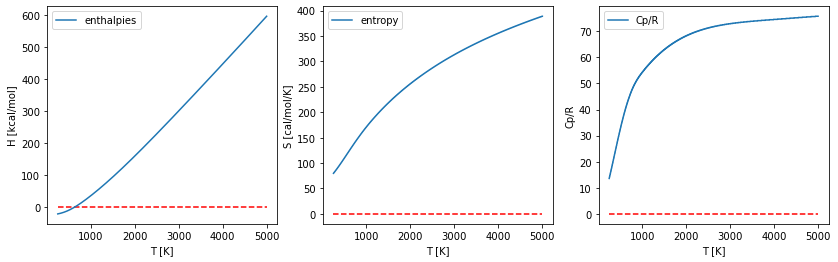

In [3]:
species, thermo, formula = read_thermo_entry(nasa)

Ts = np.arange(250, 5000)
enthalpies, entropies, cps = np.zeros_like(Ts), np.zeros_like(Ts), np.zeros_like(Ts)
for i, T in enumerate(Ts):
    enthalpies[i] = thermo.get_enthalpy(T)
    entropies[i] = thermo.get_entropy(T)
    cps[i] = thermo.get_heat_capacity(T)

fig, axes = plt.subplots(1,3,figsize=(14,4))

axes[0].plot(Ts, enthalpies/4184, label='enthalpies')
axes[0].set(xlabel='T [K]', ylabel='H [kcal/mol]')
axes[0].hlines(y=0, xmin=np.min(Ts), xmax=np.max(Ts), linestyle='--', color='r')
axes[0].legend(fontsize=10)

axes[1].plot(Ts, entropies/4.184, label='entropy')
axes[1].set(xlabel='T [K]', ylabel='S [cal/mol/K]')
axes[1].hlines(y=0, xmin=np.min(Ts), xmax=np.max(Ts), linestyle='--', color='r')
axes[1].legend(fontsize=10)

axes[2].plot(Ts, cps/8.314, label='Cp/R')
axes[2].set(xlabel='T [K]', ylabel='Cp/R')
axes[2].hlines(y=0, xmin=np.min(Ts), xmax=np.max(Ts), linestyle='--', color='r')
axes[2].legend()